# MP/BME 574: Homework Set 2

In [2]:
## MP 574 HW2
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd

font = {'weight' : 'normal',
        'size'   : 20}

In [3]:
def evalGradients(x):

    A = np.array([[1, 2, 3], 
    [0, 2, 1],
    [4, 0, 1]])
    
    C = np.diag([400,20,1])
    
    Q = (A.T).dot(C.dot(A))
    
    d = np.array([[100], 
    [100],
    [100]])

    f = 0.5*(x.T).dot(Q.dot(x)) - (x.T).dot(d)

    g = Q.dot(x) - d
    
    H = Q
    
    return f,g,H


In [12]:
print('Algorithm: Steepest Descent')
x = np.array([[0],[0],[0]])
f,g,H = evalGradients(x)
allx = x
allf = f
niter = 500
for k in range(0,niter):
    f,g,H = evalGradients(x)
    if la.norm(g)>0.000001:
        d = -g
        a0 = 0
        b0 = 1
        for kg in range(0,200):
            a1 = x + d*a0 + d*(b0-a0)*0.382;
            b1 = x + d*a0 + d*(b0-a0)*0.618;
            fa1,temp1,temp2 = evalGradients(a1);
            fb1,temp1,temp2 = evalGradients(b1);
            if fb1<fa1:
                a0 = a0 + 0.382*(b0-a0);
            else:
                b0 = a0 + 0.618*(b0-a0);
                    
              
        alpha = (a0+b0)/2;
        allx = np.concatenate((allx,x),axis=1)
        allf = np.concatenate((allf,f),axis=1)
        x = x +alpha*d;
        
        
print('Done. Cost function value:')
print(f)
print('Final estimate xhat:')
print(x)

plt.figure(figsize=(12,4))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.plot(allf.T)
plt.title('Cost function vs iterations')
plt.subplot(1,2,2)
plt.plot(allx.T);
plt.title('Estimate of x vs iterations');




Algorithm: Steepest Descent
Done. Cost function value:
[[-260.79392379]]
Final estimate xhat:
[[ 6.0065094 ]
 [ 2.72720352]
 [-3.80880069]]


Algorithm: Conjugate Gradients
Done
[[-261.73469388]]
[[ 6.37244898]
 [ 2.92346939]
 [-4.06122449]]


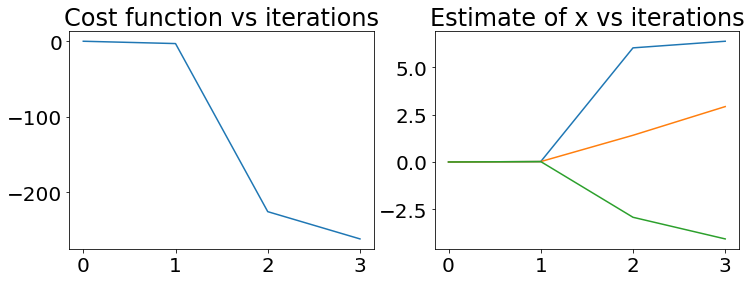

In [10]:
print('Algorithm: Conjugate Gradients')
x = np.array([[0],[0],[0]])
f,g,Q = evalGradients(x)
allx = x
allf = f
niter = 500
if la.norm(g)>0.000001:
    d = -g
    k=0;
    while k < niter:
        a = -((g.T).dot(d))/((d.T).dot(Q.dot(d)));
        x = x + a*d;
        f,g,Q = evalGradients(x)
        allx = np.concatenate((allx,x),axis=1)
        allf = np.concatenate((allf,f),axis=1)
        if la.norm(g)>0.000001:
            b = ((g.T).dot(Q.dot(d)))/((d.T).dot(Q.dot(d)));
            d = -g + b*d;
        else:
            k = niter
        k = k+1
   
        
print('Done. Cost function value:')
print(f)
print('Final estimate xhat:')
print(x)

plt.figure(figsize=(12,4))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.plot(allf.T)
plt.title('Cost function vs iterations')
plt.subplot(1,2,2)
plt.plot(allx.T);
plt.title('Estimate of x vs iterations');




In [11]:
print('Algorithm: Newton')
x = np.array([[0],[0],[0]])
f,g,H = evalGradients(x)
allx = x
allf = f
niter = 500
k = 0
while k < niter:
    f,g,H = evalGradients(x)
    allx = np.concatenate((allx,x),axis=1)
    allf = np.concatenate((allf,f),axis=1)        
    if la.norm(g)>0.000001:
        x = x - la.inv(H).dot(g)
    else: 
        k=niter
    k=k+1    
    
print('Done. Cost function value:')
print(f)

print('Final estimate xhat:')
print(x)

plt.figure(figsize=(12,4))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.plot(allf.T)
plt.title('Cost function vs iterations')
plt.subplot(1,2,2)
plt.plot(allx.T);
plt.title('Estimate of x vs iterations');




Algorithm: Newton
Done
[[-261.73469388]]
[[ 6.37244898]
 [ 2.92346939]
 [-4.06122449]]
